<img src="Logo.png" width="100" align="left"/> 

# <center>Data Analytics project:</center>



Congratulations on finishing the lessons content for this second unit !

We have seen a lot of concepts in the second unit and we had the chance to test some of them. Now, we get to see how these different concepts are used to better understand our data.

## Some guidelines: 
1. To run a cell you can use the shortcut use : Shift + Enter

2. Only sections mentioned as To-Do are the places where you should put in your own code other than that we do not recommend that you change the provided code.

3. You will be graded for the visibility of your code so make sure you respect the correct indentation and that your code contains suitable variables names.

4. This notebook is designed in a sequential way so if you solve your project on different days make sure to run the previous cells before you can run the one you want.

5. Teacher assistants in the slack space remain available to answer any questions you might have.

>Best of luck ! 

## Project Sections:
In this project you will practice some of the concepts seen in the data analytics unit, you will deal with a real dataset. This dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015.

Our goal is to analyze this dataset, clean it then create a simple linear regression model using it.

This project is devided into n sections : 
1. [Setting the environement](#set_env)

2. [Importing necessary tools](#importing)

3. [Dataset discovery](#dataset_discovery)

4. [NA handling](#na_handling)

5. [Useless variables deletion](#useless_var)

6. [Outliers detection](#outliers)

7. [Feature selection](#feature_selection)

8. [Linear regression](#linear_reg)

### 1. Setting the environement:  <a id='set_env'></a>

In [2]:
# Make sure you have virtualenv installed 
!pip install --user virtualenv

In [5]:
# To-Do: create a virtual environement called data_analytics
!python -m venv data_analytics

In [6]:
# Activate the environement for windows
!cd data_analytics/Scripts
!activate.bat

In [ ]:
# Activate the environement for linux (debian based)
!. data_analytics/bin/activate

### 2. Importing necessary tools:<a id='importing'></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Dataset discovery:<a id='dataset_discovery'></a>

In [24]:
# To-Do: Read the file ("kc_house_data.csv") using pandas and store in a dataframe called df
df = pd.read_csv("kc_house_data.csv")
# To-Do: Print the dataframe's shape
df.shape

(21613, 21)

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503


In [26]:
# To-Do: Print the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21606 non-null object
price            21608 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21612 non-null float64
sqft_lot         21612 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21609 non-null float64
sqft_basement    21613 non-null int64
yr_built         21611 non-null float64
yr_renovated     21612 non-null float64
zipcode          21611 non-null float64
lat              21612 non-null float64
long             21613 non-null float64
sqft_living15    21612 non-null float64
sqft_lot15       21613 non-null int64
dtypes: float64(12), int64(8), object(1)
memory usage: 3.5+ MB


### 4. NA handling:<a id='na_handling'></a>
It is clear after printing the dataset info that there are some variables that have less entries than the number of rows which means that some of them don't have values in certain rows.

Given the number of the na values, what do you think is the best method to deal with them?

In [27]:
# To-Do: deal with the NAs in your dataset in one line
df.isna()
df.isna().sum()

id               0
date             7
price            5
bedrooms         0
bathrooms        0
sqft_living      1
sqft_lot         1
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       4
sqft_basement    0
yr_built         2
yr_renovated     1
zipcode          2
lat              1
long             0
sqft_living15    1
sqft_lot15       0
dtype: int64

In [28]:
#The number of missing values isnt important, we can use the listwise deletion 
df.dropna(inplace=True)

### 5. Useless variables deletion:<a id='useless_var'></a>
We want to eventually do a regression on it so naturally some variables bring no added value and can be delted without impacting the results.

Delete the column that correspond to variables that aren't needed.

In [29]:
# To-Do: delete the values of the variables that are useless
del df['id']
del df['zipcode']
del df["yr_built"]
del df["yr_renovated"]
del df["date"]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21588 entries, 0 to 21612
Data columns (total 16 columns):
price            21588 non-null float64
bedrooms         21588 non-null int64
bathrooms        21588 non-null float64
sqft_living      21588 non-null float64
sqft_lot         21588 non-null float64
floors           21588 non-null float64
waterfront       21588 non-null int64
view             21588 non-null int64
condition        21588 non-null int64
grade            21588 non-null int64
sqft_above       21588 non-null float64
sqft_basement    21588 non-null int64
lat              21588 non-null float64
long             21588 non-null float64
sqft_living15    21588 non-null float64
sqft_lot15       21588 non-null int64
dtypes: float64(9), int64(7)
memory usage: 2.8 MB


### A wild playground appears !!
In the next cell, go wild with the dataset discovery.
You can calculate the mean, the median or do anything you want to learn more the data.

<b>Pro tip :</b> 
Sometimes you might want to know how many unique variables a column has, to do so you can use the padas function :

<center>pd.unique(df['column_name'])</center>

In [31]:
# To-Do : get to know more your data WITHOUT modifying it !!

pd.unique(df['sqft_living'])
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.158800e+04,21588.000000,21588.000000,21588.000000,2.158800e+04,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000,21588.000000
mean,5.401545e+05,3.370576,2.114670,2079.916528,1.511370e+04,1.494187,0.007550,0.234297,3.409626,7.656985,1788.385353,291.531175,47.560054,-122.213889,1986.594265,12771.769826
std,3.671493e+05,0.929870,0.770085,918.538221,4.144320e+04,0.539989,0.086567,0.766200,0.650932,1.175540,828.218416,442.624173,0.138558,0.140825,685.364986,27316.243753
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219875e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


### 6.Outliers detection:<a id='outliers'></a>
Having outliers is a common problem that might affect the quality of the model that we're building.

Let's assume that we're not interested in very expensive or very cheap houses, we want a model that best fits the average priced houses.

To create such a model, we detect outliers and delete them using the Z-score method seen in the lessons.

In [32]:
# To-Do : detect the outliers then delete them ad delete the column created to calculate the Z-score
df["price_zscore"] = (df.price - df.price.mean()) / df.price.std()
df = df[df["price_zscore"] > 3]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 21 to 21576
Data columns (total 17 columns):
price            405 non-null float64
bedrooms         405 non-null int64
bathrooms        405 non-null float64
sqft_living      405 non-null float64
sqft_lot         405 non-null float64
floors           405 non-null float64
waterfront       405 non-null int64
view             405 non-null int64
condition        405 non-null int64
grade            405 non-null int64
sqft_above       405 non-null float64
sqft_basement    405 non-null int64
lat              405 non-null float64
long             405 non-null float64
sqft_living15    405 non-null float64
sqft_lot15       405 non-null int64
price_zscore     405 non-null float64
dtypes: float64(10), int64(7)
memory usage: 57.0 KB


### 7.Feature selection:<a id='feature_selection'></a>
It is clear that even after deleting some features, there might be other features that aren't obviously useless but can be delted and keep a good overall performance.

To verify this, we perform feature selection on our variables.

In [34]:
# To-Do : perform feature selection using correlation
del df['price_zscore']
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.189290,0.460795,0.599631,-0.044052,0.036828,0.220422,0.196586,-0.042742,0.396800,0.465029,0.328128,0.054533,-0.072504,0.214098,0.001188
bedrooms,0.189290,1.000000,0.427067,0.402132,-0.085008,0.181461,-0.185200,-0.114861,0.053567,0.081547,0.325971,0.198706,0.038653,-0.014286,0.116083,-0.082147
bathrooms,0.460795,0.427067,1.000000,0.715722,0.075766,0.200562,-0.113222,-0.024007,-0.215557,0.477499,0.627471,0.282087,-0.012192,0.140179,0.107454,0.076847
sqft_living,0.599631,0.402132,0.715722,1.000000,0.145417,0.224193,-0.062433,0.008835,-0.136512,0.598503,0.816237,0.485612,-0.061677,0.220830,0.280647,0.213038
sqft_lot,-0.044052,-0.085008,0.075766,0.145417,1.000000,0.096867,-0.052431,-0.006204,-0.095415,0.172398,0.205789,-0.061171,-0.111021,0.515575,-0.032870,0.781135
floors,0.036828,0.181461,0.200562,0.224193,0.096867,1.000000,-0.046403,-0.052277,-0.089357,0.262573,0.410336,-0.235130,0.009165,-0.059578,-0.087520,0.030301
waterfront,0.220422,-0.185200,-0.113222,-0.062433,-0.052431,-0.046403,1.000000,0.592555,0.003690,-0.127055,-0.139126,0.103090,-0.059590,0.079382,-0.058957,-0.013907
view,0.196586,-0.114861,-0.024007,0.008835,-0.006204,-0.052277,0.592555,1.000000,0.127567,-0.028026,-0.169115,0.271098,-0.021031,-0.063326,0.084537,0.004152
condition,-0.042742,0.053567,-0.215557,-0.136512,-0.095415,-0.089357,0.003690,0.127567,1.000000,-0.237628,-0.260298,0.158974,0.031030,-0.260527,0.065095,-0.080153
grade,0.396800,0.081547,0.477499,0.598503,0.172398,0.262573,-0.127055,-0.028026,-0.237628,1.000000,0.601957,0.118994,-0.107003,0.168156,0.269792,0.212541


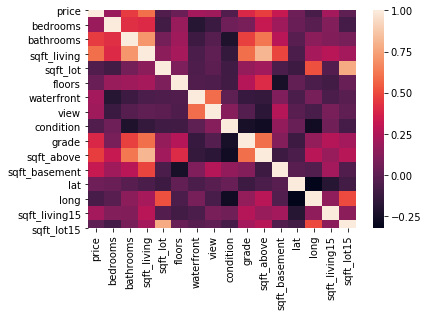

In [35]:
sns.heatmap(df.corr())

In [36]:
# To-Do : drop the variables that seem highly correlated to you
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print (to_drop)

['sqft_living', 'sqft_above', 'sqft_lot15']


In [37]:
df.drop(df[to_drop], axis=1)

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,lat,long,sqft_living15
21,2000000.0,3,2.75,44867.0,1.0,0,4,3,9,720,47.5316,-122.233,4110.0
153,2250000.0,4,3.25,19850.0,2.0,0,3,3,12,1640,47.5620,-122.162,3160.0
246,2400000.0,4,2.50,8354.0,1.0,1,4,3,9,1820,47.6338,-122.072,3120.0
269,2900000.0,4,3.25,20100.0,1.5,0,2,3,11,300,47.6312,-122.223,3890.0
282,2050000.0,5,3.00,8480.0,2.0,0,1,5,9,1200,47.6166,-122.287,3050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,1865000.0,4,3.75,8797.0,2.0,0,0,3,11,500,47.6351,-122.236,2660.0
21530,3000000.0,4,3.75,14823.0,1.0,0,0,3,11,910,47.6200,-122.207,3030.0
21540,1881580.0,5,3.50,13000.0,2.0,0,3,3,10,1490,47.5382,-122.111,5790.0
21568,1700000.0,4,3.50,8963.0,2.0,0,0,3,10,710,47.5990,-122.197,2190.0


### 8.Linear regression:<a id='linear_reg'></a>
Now that our data is clean and ready to be used, let's try to fit it into a linear regression model.

<ul>
    <li>We begin by splitting our variables into dependant and independant variables.</li>
    <li>We create the model using the LinearRegression class.</li>
    <li>We evaluate our model using the R² score</li>
</ul>

In [38]:
# Splitting the data into dependant and independant variables
Y = df['price']
X = df.drop(['price'],axis = 1)

In [40]:
from sklearn.linear_model import LinearRegression
# To-Do : Create a linear regression model using the LinearRegression class then fit it to the data
linear_reg = LinearRegression()
linear_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
linear_reg.coef_

array([-1.90609532e+04,  7.88591882e+04,  1.96578119e+02,  1.07072978e+00,
       -2.94686421e+05,  6.42711226e+05,  2.70775614e+03,  1.73599222e+04,
        6.77170763e+04,  1.61436700e+02,  3.51414173e+01,  8.38523657e+05,
       -2.22495440e+06,  9.34661959e+01, -2.96048575e+00])

In [42]:
linear_reg.intercept_

-311953845.73752075

In [44]:
# The function used to calculate the R² score is the method "score" found in the LinearRegression class
linear_reg.score(X, Y)

0.5319719397750664

## Conclusion:
Data preparation is a very important step in the machine learning pipeline. It is crucial to clean our data and understand it very well before we can create any model on the data.

In this notebook, we have spent 4 steps preparing our data but only 1 to create the model. This reflects how time consuming the process of data preparation is compared to the other steps as well as the importance of the quality of the data used.

In the next unit, we will see more about the models creation process and see a lot of important concepts in depth.